In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_index = pd.read_csv('data/index.csv')
df_preprocessed = pd.read_csv('data/articles_preprocessed.csv')

In [3]:
df_index.iloc[0]

title          Cosmere
aa                 0.0
ab                 0.0
aback              0.0
abamabar           0.0
                ...   
zoom               0.0
zoroastrian        0.0
zu                 0.0
zuln               0.0
zyardil            0.0
Name: 0, Length: 11945, dtype: object

In [4]:
df_preprocessed.head()

,title,url,article
0,Cosmere,https://coppermind.net/wiki/Cosmere,stumbl someth far far bigger polit littl plane...
1,Shattering,https://coppermind.net/wiki/Shattering_of_Adon...,sixteen peopl togeth kill adonalsium rip apart...
2,Shard,https://coppermind.net/wiki/Shard,shard god piec god ruin preserv autonomi culti...
3,Adonalsium,https://coppermind.net/wiki/Adonalsium,delv search abl come singl name adonalsium yet...
4,Earth,https://coppermind.net/wiki/Earth,disambigu page list articl associ titl intern ...


In [5]:
df_preprocessed["length"] = df_preprocessed["article"].str.split().str.len()
df_preprocessed.head()

,title,url,article,length
0,Cosmere,https://coppermind.net/wiki/Cosmere,stumbl someth far far bigger polit littl plane...,4611
1,Shattering,https://coppermind.net/wiki/Shattering_of_Adon...,sixteen peopl togeth kill adonalsium rip apart...,196
2,Shard,https://coppermind.net/wiki/Shard,shard god piec god ruin preserv autonomi culti...,1786
3,Adonalsium,https://coppermind.net/wiki/Adonalsium,delv search abl come singl name adonalsium yet...,776
4,Earth,https://coppermind.net/wiki/Earth,disambigu page list articl associ titl intern ...,25


In [6]:
df_preprocessed

,title,url,article,length
0,Cosmere,https://coppermind.net/wiki/Cosmere,stumbl someth far far bigger polit littl plane...,4611
1,Shattering,https://coppermind.net/wiki/Shattering_of_Adon...,sixteen peopl togeth kill adonalsium rip apart...,196
2,Shard,https://coppermind.net/wiki/Shard,shard god piec god ruin preserv autonomi culti...,1786
3,Adonalsium,https://coppermind.net/wiki/Adonalsium,delv search abl come singl name adonalsium yet...,776
4,Earth,https://coppermind.net/wiki/Earth,disambigu page list articl associ titl intern ...,25
...,...,...,...,...
995,Category:Metals,https://coppermind.net/wiki/Metal,categori known metal inform glyph use see stee...,9
996,Tinningdar,https://coppermind.net/wiki/Tinningdar,tinningdar name tradit terri robe worn scadria...,160
997,Trell (Trellism),https://coppermind.net/wiki/Trellism,look small spike hand heard name year ago spok...,470
998,Charlie,https://coppermind.net/wiki/Charlie,might said way word word often got away hoid c...,521


In [7]:
df_preprocessed["length"].describe()

count     1000.000000
mean       342.042000
std       1100.393622
min          5.000000
25%         44.000000
50%        126.500000
75%        317.500000
max      20863.000000
Name: length, dtype: float64

In [8]:
words = {}
for article in df_preprocessed["article"]:
    for word in article.split():
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

sorted_words = sorted(words.items(), key=lambda x: x[1], reverse=True)
sorted_words[:10]

[('kaladin', 3330),
 ('one', 2256),
 ('use', 2085),
 ('shallan', 1872),
 ('dalinar', 1826),
 ('also', 1513),
 ('like', 1387),
 ('would', 1373),
 ('time', 1276),
 ('peopl', 1118)]

In [9]:
sorted_words[-1:-10:-1]

[('ador', 1),
 ('reenact', 1),
 ('forecannon', 1),
 ('chuck', 1),
 ('anecdot', 1),
 ('musicianship', 1),
 ('kernel', 1),
 ('apocalypt', 1),
 ('tregal', 1)]

<Axes: >

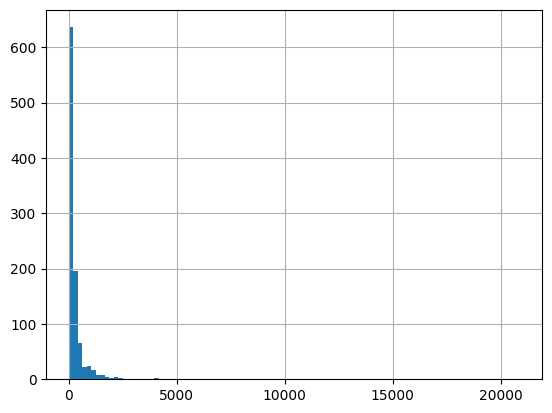

In [10]:
df_preprocessed["length"].hist(bins=100)